Name : Mohammed Aatif

Experiment 1: Working with Python packages-Numpy, Scipy, Scikit-Learn, Matplotlib

In [12]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) IRIS DATASET

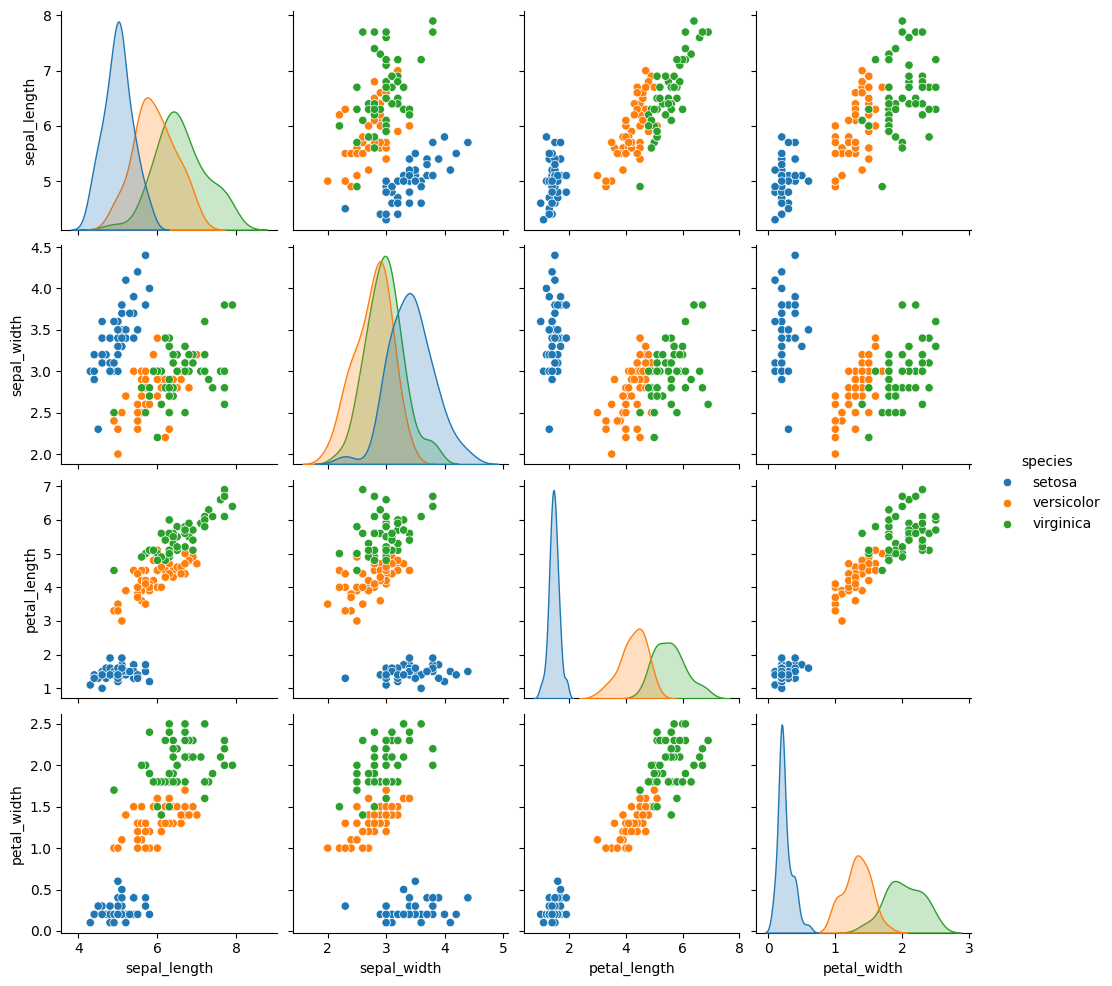


--- IRIS DATASET ---
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.show()

X = iris.drop('species', axis=1)
y = iris['species']
X_new = SelectKBest(score_func=f_classif, k='all').fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n--- IRIS DATASET ---")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [14]:
import pandas as pd
import numpy as np

# Generate dummy data
n = 500
data = {
    'Customer ID': [f"CUST{i:04d}" for i in range(n)],
    'Name': [f"Customer_{i}" for i in range(n)],
    'Property ID': [f"PROP{i:04d}" for i in range(n)],
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Income': np.random.randint(30000, 150000, n),
    'Credit Score': np.random.randint(300, 850, n),
    'Loan Term (Years)': np.random.choice([10, 15, 20, 25, 30], n),
    'Loan Sanction Amount (USD)': np.random.randint(10000, 500000, n)
}

df = pd.DataFrame(data)

# Save to CSV
file_path = '/content/train.csv'
df.to_csv(file_path, index=False)
print(f" Dummy Loan dataset saved to: {file_path}")
df.head()

 Dummy Loan dataset saved to: /content/train.csv


,Customer ID,Name,Property ID,Gender,Income,Credit Score,Loan Term (Years),Loan Sanction Amount (USD)
0,CUST0000,Customer_0,PROP0000,Male,127972,676,30,206262
1,CUST0001,Customer_1,PROP0001,Male,110052,512,15,248000
2,CUST0002,Customer_2,PROP0002,Male,119809,507,30,241891
3,CUST0003,Customer_3,PROP0003,Female,55013,465,25,249301
4,CUST0004,Customer_4,PROP0004,Male,60169,499,15,276124


2) LOAN AMOUNT DATASET


--- LOAN AMOUNT DATASET ---
RMSE: 16970507935.439386
R² Score: -0.010624802448613746


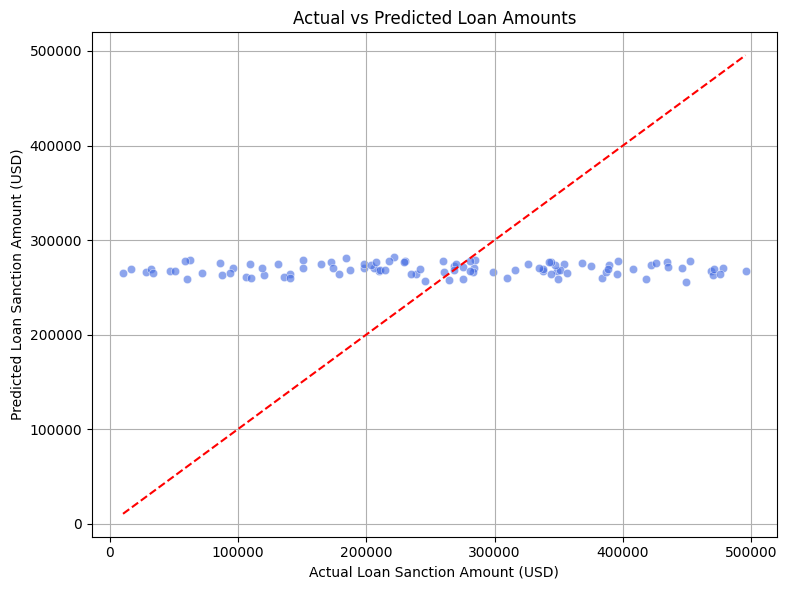

In [15]:
#  Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/train.csv')

#  Drop unnecessary columns and handle missing values
df.drop(columns=["Customer ID", "Name", "Property ID"], inplace=True)
df.dropna(inplace=True)

# Prepare input features and target variable
X = pd.get_dummies(df.drop(columns=["Loan Sanction Amount (USD)"]), drop_first=True)
y = df["Loan Sanction Amount (USD)"]

#  Scale features
X = StandardScaler().fit_transform(X)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#  Predict and evaluate
y_pred = model.predict(X_test)

print("\n--- LOAN AMOUNT DATASET ---")
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Loan Sanction Amount (USD)")
plt.ylabel("Predicted Loan Sanction Amount (USD)")
plt.title("Actual vs Predicted Loan Amounts")
plt.grid(True)
plt.tight_layout()
plt.show()


3) DIABETES DATASET


--- DIABETES DATASET ---
Accuracy: 0.734375
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       123
           1       0.63      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.73      0.73       192



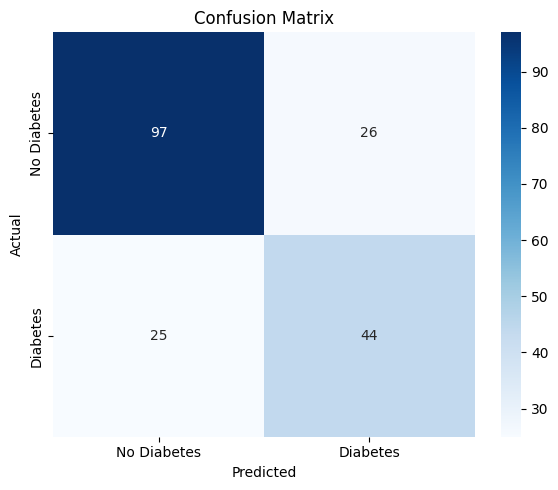

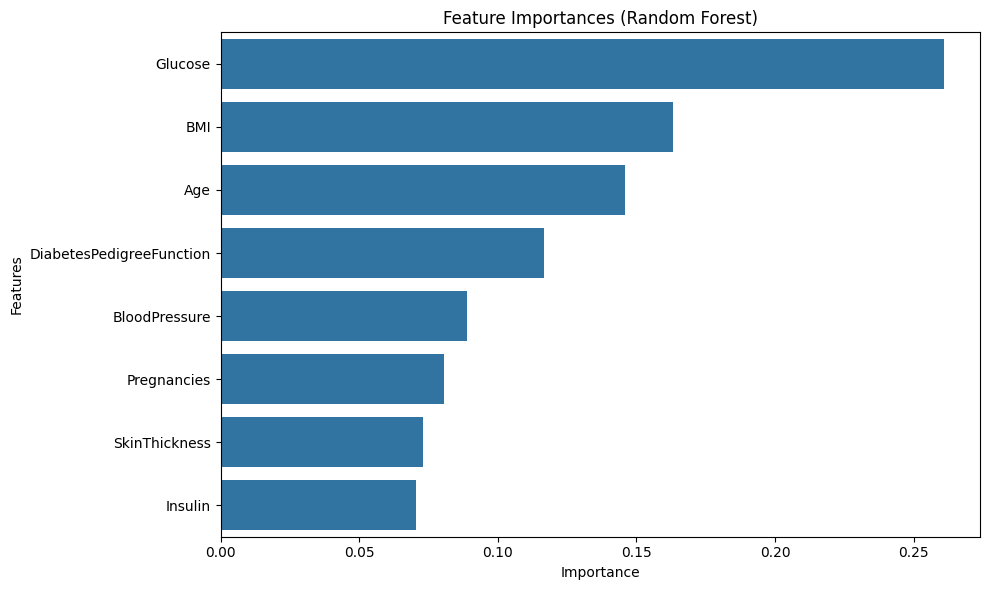

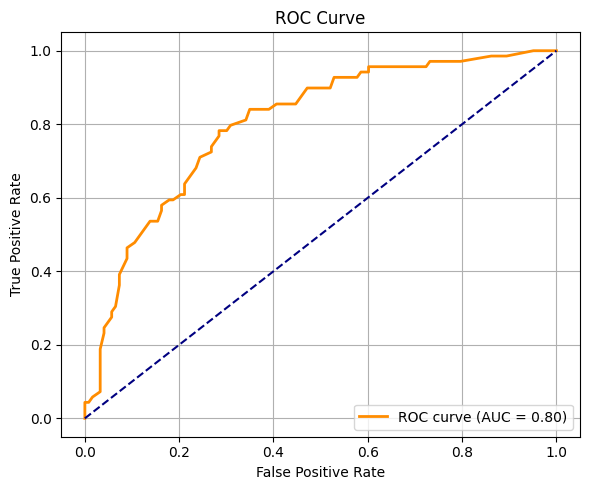

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/drive/MyDrive/1/diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n--- DIABETES DATASET ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Feature Importance
import numpy as np
feature_names = df.columns[:-1]
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
y_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

4) SPAM DATASET

In [17]:
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("/content/drive/MyDrive/1/spambase.data", header=None)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n--- SPAM DATASET ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


--- SPAM DATASET ---
Accuracy: 0.8067318132464713
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       538
           1       0.70      0.93      0.80       383

    accuracy                           0.81       921
   macro avg       0.82      0.82      0.81       921
weighted avg       0.84      0.81      0.81       921



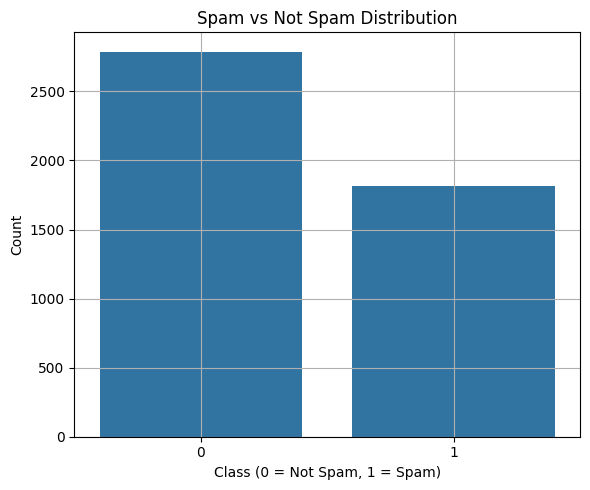

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spam dataset
df = pd.read_csv("/content/drive/MyDrive/1/spambase.data", header=None)

# Last column = target (0 = not spam, 1 = spam)
y = df.iloc[:, -1]

# Plot distribution
plt.figure(figsize=(6,5))
sns.countplot(x=y)
plt.title("Spam vs Not Spam Distribution")
plt.xlabel("Class (0 = Not Spam, 1 = Spam)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


5) MNIST DIGITS DATASET

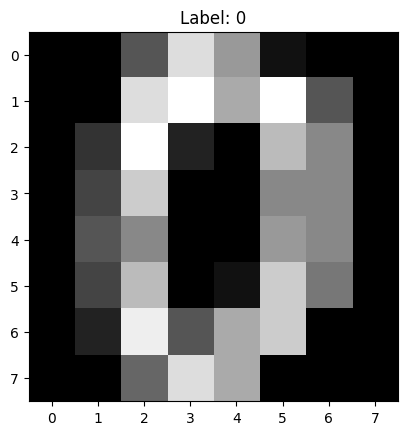


--- MNIST DATASET ---
Accuracy: 0.9685185185185186
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.95      0.95        66
           6       0.96      0.98      0.97        53
           7       1.00      0.96      0.98        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [19]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

plt.imshow(digits.images[0], cmap='gray')
plt.title(f'Label: {digits.target[0]}')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n--- MNIST DATASET ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))